# 1. Motivation

* **What is your dataset?**
  
  The main dataset focuses on the energy consumption and production in Denmark at a household level, specifically detailing electricity usage, production from solar panels, and interactions with the electrical grid.
  
  The key variables include:
    * Daily Power Produced (from solar panels)
    * Daily Power Used (household energy consumption)
    * Daily Power Self-Used (energy consumed directly from solar production)
    * Daily Power Bought from Grid

  The data ranges from November 2022 to April 2024. The values are recorded on a daily level.

  Additionally, information on the household location and the age of the household owners is available.


* **Why did you choose this/these particular dataset(s)?**
    
    The dataset was selected based its relevance for a long-term sustainable transformation of the energy sector and the contribution of solar power towards energy self-sufficiency. The detailed information on the different regions and age groups is interesting to analyze and to discover trends and differences within the population. 

* **What was your goal for the end user's experience?**

    Initially, the user is presented an overview over the usage and popularity of solar power in Denmark.
    This serves the purpose of illustrating an increased demand for solar panels since 2022 and thus aids comprehending the effects of market mechanisms on the usage and production of solar energy.

    Additionally, the user is enabled to interactively explore the solar power production of individual households across different regions and age groups. A direct comparison of self-used and produced solar energy shows potentials for a higher usage of renewable energy. 

# 2. Basic Stats


    Write about your choices in data cleaning and preprocessing
    Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.


In the following, basic data preparation and key statistics are provided. Please read the descriptions above the respective code snippets and plots for more information.  

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
df_age=pd.read_csv('data/user_id-age.csv',sep=';')
df_age.rename(columns={'Kunde ID':'user_id','Fødselsdato':'birth_date'},inplace=True)

df_age['birth_date']=pd.to_datetime(df_age['birth_date'], errors='coerce',format='%d/%m/%Y')
df_age['age']=2024-df_age['birth_date'].dt.year

In [69]:
df_raw=pd.read_csv('data/dfMerged.csv')
df_raw.drop(columns=['age'],inplace=True)
df_raw=pd.merge(df_raw,df_age[['user_id','age']],on='user_id',how='left')

df=df_raw.copy()
df['usage_date'] = pd.to_datetime(df['usage_date'], format='%d/%m/%Y')


The dataset contains 829 individual households and records data on 967 days.
Most households have had solar panel installations after the beginning of the dataset (after November 2022), thus the number of daily recordings increased continuously.

In [70]:
unique_values_count = df.nunique()
print(unique_values_count)

user_id                 829
usage_date              967
totalBuyPower         11842
totalProductPower      8826
totalUsePower         12359
totalOnGridPower       6873
night_usage          216640
totalSelfUsePower      6481
latitude                821
longitude               821
age                      63
dtype: int64


Here, the number of users recording data on each day is calculated, as well as the number of days each user has recorded data.
Especially in the winter 2022/23, a very strong increase in registered users can be detected.

In [71]:
df_day=df['usage_date'].value_counts(ascending=False).sort_index()
df_user=df['user_id'].value_counts(ascending=False).sort_index()

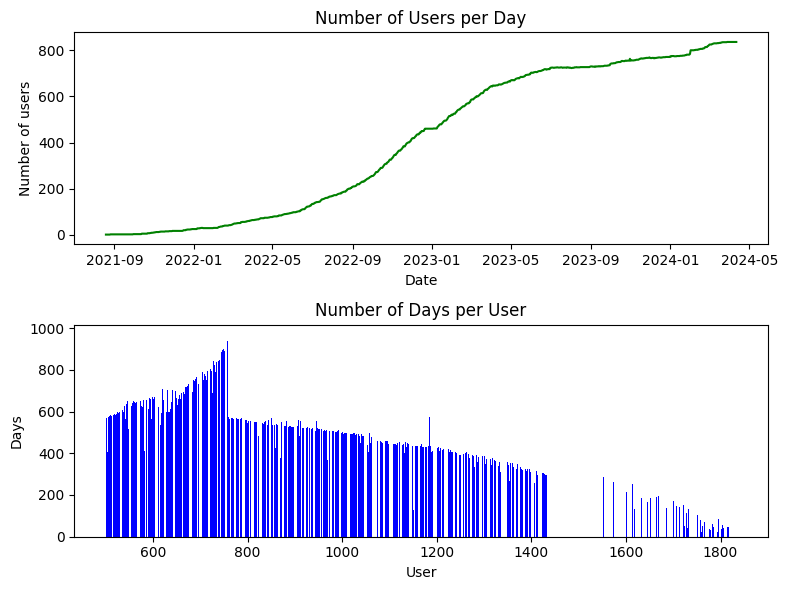

In [72]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Plot df_day
axs[0].plot(df_day.index, df_day.values,color='green')
axs[0].set_title('Number of Users per Day')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Number of users')

# Plot df_user
axs[1].bar(df_user.index, df_user.values,color='blue')
axs[1].set_title('Number of Days per User')
axs[1].set_xlabel('User')
axs[1].set_ylabel('Days')

plt.tight_layout()
plt.show()

A description of key statistical values is presented below. Most likely due to reading errors or other technical failures, some outliers with very high daily production or usage levels are identified.
These outliers have been removed from the dataset to avoid a distortion of the data.

In [73]:
df_raw.describe()

,user_id,totalBuyPower,totalProductPower,totalUsePower,totalOnGridPower,night_usage,totalSelfUsePower,latitude,longitude,age
count,395032.000000,3.950320e+05,395032.000000,3.950320e+05,395032.000000,395032.000000,395032.000000,393271.000000,393271.000000,234509.000000
mean,901.398322,2.717430e+01,16.029122,3.362685e+01,7.930509,12.327777,8.098612,55.661444,11.860015,52.744270
std,283.980312,7.093441e+03,19.659193,6.715928e+03,12.550965,13.665522,12.501414,0.332869,0.903134,15.053959
min,501.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,54.572157,8.114217,-41.000000
25%,670.000000,5.700000e-01,1.020000,8.270000e+00,0.000000,3.923479,0.730000,55.539918,11.752994,44.000000
50%,852.000000,7.640000e+00,9.260000,1.659000e+01,0.520000,7.717875,5.820000,55.670121,12.163536,53.000000
75%,1101.000000,2.295000e+01,26.750000,3.185000e+01,12.210000,16.158958,11.700000,55.843359,12.399912,63.000000
max,1833.000000,4.458331e+06,4060.870000,4.221060e+06,92.020000,930.508750,4058.030000,57.426306,15.128681,162.000000


In [74]:
df=df[(df.totalUsePower<500) & (df.totalProductPower<500) & (df.totalSelfUsePower<500) & (df.totalBuyPower<500)]

Similarly, a separate dataset is created to remove the individuals with invalid ages such as -42, -37, 0, 1, 2 and 162 as well as individuals with missing values.

In [75]:
df_ind_age=df_raw.groupby('user_id')['age'].mean()
print(df_ind_age[(df_ind_age<18)|(df_ind_age>90)])
age_data=df[(df.age>=18) & (df.age<=99)]

user_id
549       1.0
571       1.0
619       2.0
668       2.0
725       2.0
1045    -41.0
1121    -37.0
1644      1.0
1657      1.0
1817    162.0
Name: age, dtype: float64


Below, the filtered dataset is described. The mean of both totalBuyPower and totalUsePower have been strongly affected by the outliers and now better represent the data.

In [76]:
df.describe()

,user_id,totalBuyPower,totalProductPower,totalUsePower,totalOnGridPower,night_usage,totalSelfUsePower,latitude,longitude,age
count,395027.000000,395027.000000,395027.000000,395027.000000,395027.000000,395027.000000,395027.000000,393266.000000,393266.000000,234505.000000
mean,901.399532,15.873789,16.009526,22.907350,7.930538,12.325544,8.078989,55.661452,11.860013,52.744086
std,283.981432,21.213113,17.844369,21.821456,12.551025,13.587266,9.392527,0.332859,0.903140,15.054018
min,501.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.572157,8.114217,-41.000000
25%,670.000000,0.570000,1.020000,8.270000,0.000000,3.923500,0.730000,55.539918,11.752994,44.000000
50%,852.000000,7.640000,9.260000,16.590000,0.520000,7.718000,5.820000,55.670260,12.163536,53.000000
75%,1101.000000,22.950000,26.745000,31.850000,12.210000,16.159000,11.700000,55.843359,12.399912,63.000000
max,1833.000000,281.190000,105.820000,281.190000,92.020000,160.734750,103.630000,57.426306,15.128681,162.000000


# 3. Data Analysis

This section provides deeper insights into the dataset. It contains the initial ideas leading up to the creation of the visualizations on the webpage.

## Age Groups

In [78]:
age_by_user = age_data.groupby('user_id')['age'].mean().value_counts().sort_index()

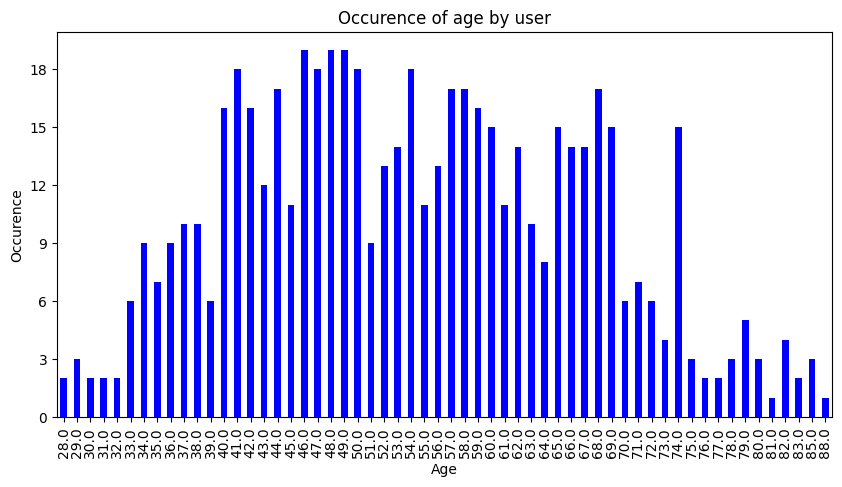

In [79]:
plt.figure(figsize=(10, 5))

age_by_user.plot(kind='bar', color='blue')

plt.xlabel('Age')
plt.ylabel('Occurence')
plt.title('Occurence of age by user')

locs, labels = plt.yticks()  # Retrieve original tick values
dloc = np.ceil(locs[1] - locs[0]).astype(int)  # Get tick spacing
dloc_int = int(dloc)  # Define new integer tick spacing
new_yticks = np.arange(locs.min(), locs.max(), dloc_int, dtype=int)
plt.yticks(new_yticks)

plt.show()

In [80]:
age_by_user.sum()/4

144.75

In [81]:
print(age_by_user[age_by_user.index<=44].sum())
print(age_by_user[(age_by_user.index>44)&(age_by_user.index<=53)].sum())
print(age_by_user[(age_by_user.index>53)&(age_by_user.index<=64)].sum())
print(age_by_user[age_by_user.index>64].sum())

147
140
150
142


In [82]:
age_group1=age_data[age_data.age<=44]
age_group2=age_data[(age_data.age>44) & (age_data.age<=53)]
age_group3=age_data[(age_data.age>53) & (age_data.age<=64)]
age_group4=age_data[age_data.age>64]

In [83]:
print(len(age_group1),len(age_group2),len(age_group3),len(age_group4))

58026 58592 60197 52955


<Axes: >

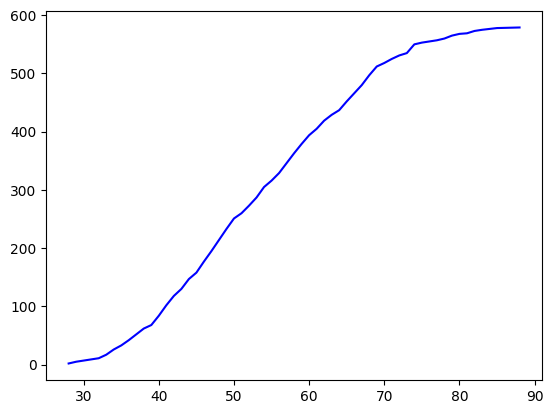

In [84]:
age_by_user.cumsum().plot(kind='line', color='blue')

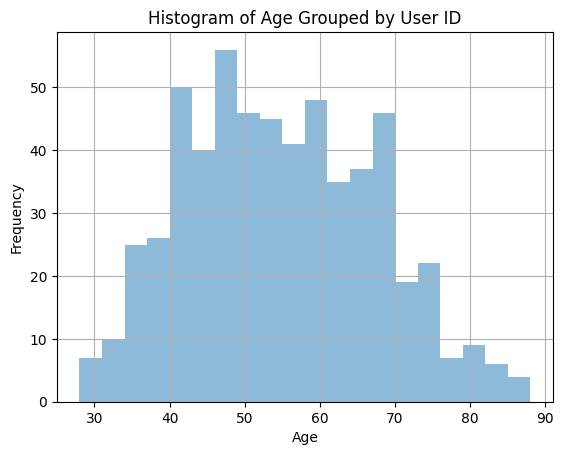

In [85]:
age_data.groupby('user_id')['age'].mean().hist(alpha=0.5, bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age Grouped by User ID')
plt.show()

## Solar Energy Usage and Production

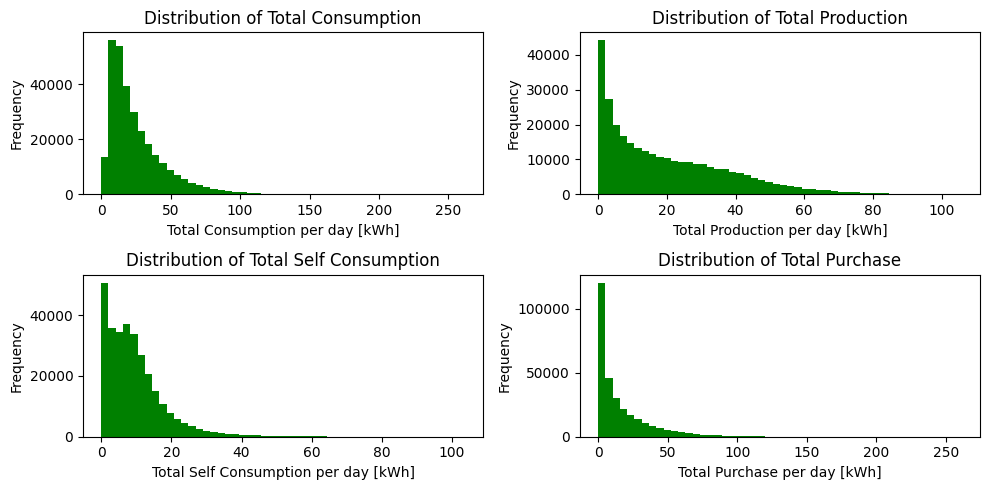

In [86]:
features=['totalUsePower','totalProductPower','totalSelfUsePower','totalBuyPower']
df_reduced=df.copy()
df_reduced=df_reduced[(df_reduced.totalUsePower>0) & (df_reduced.totalProductPower>0) & (df_reduced.totalSelfUsePower>0) & (df_reduced.totalBuyPower>0)]

feature_names=['Total Consumption','Total Production','Total Self Consumption','Total Purchase']
fig, axs = plt.subplots(2, 2, figsize=(10, 5))

for i, feature in enumerate(features):
    row = i // 2
    col = i % 2

    # counts, bins, _ = axs[row, col].hist(df_reduced[feature], bins=50)
    # non_zero_bins = bins[:-1][counts > 0]
    axs[row, col].hist(df_reduced[feature], bins=50,color='green')
    axs[row, col].set_title(f"Distribution of {feature_names[i]}")
    axs[row, col].set_xlabel(f"{feature_names[i]} per day [kWh]")
    axs[row, col].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# 4. Genre

## 4.1 Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?

### 4.1.1 Visual structure
* **Establishing Shot/ Splash Screen**: In the website, we set a homepage in order to present a basic information with some text description. This is the initial visual that sets the scene for the story, giving viewers a context or overview of what they are about to see. We believe that an attractive splash screen could catch the soul of viewer in the first sight.
* **Consistent Visual Platform**: We choose streamlit as new framework to build and share data, which provides a series of built-in visual components standardized in visual presentation, ensuring consistency and beauty of the application interface. A uniform design or style that carries through the entire visualization to maintain a coherent visual experience.

### 4.1.2 Highlighting
* **Feature Distinction**: It is the obvious and frequent method that we used in many plots. Use visual techniques like color, shape, or size to distinguish and emphasize different parts of the visualization, so that viewers can quickly understand different data sets or categories without confusion and it ensures that important information stands out which enhances the viewer's recall ability. And of course the clear visual distinctions make it easier to compare and contrast different data points or categories.
* **Zooming**: Adjust the visual scale to either focus on details or pull back to show context. This method is the best way to be shown in the map plots. Zooming allows viewers to see more details by magnifying specific areas or objects. This is crucial for understanding complex images or datasets, such as street-level information in map applications. And also zooming enables the control of how much information is displayed, which is especially important in data visualization. Users can choose to view an overview or zoom in for detailed data, adjusting the density and scope of information flexibly.

### 4.1.3 Transition Guidance
* **Familiar Objects (but still cuts)**: When discussing solar energy usage across the Denmark, integrate images of iconic buildings or landscapes to help readers visually recognize and transition between sections. For example, when talking about solar energy advancements, we could include an image of the Copenhagen International School with the world largest solar facade.
* **Object Continuity**: In case studies, consistently display specific components or symbols of a solar project, such as solar consumption, to maintain visual continuity throughout the article.

## 4.2 Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

### 4.2.1 Ordering

* **User Direct Path**: When describing the different consumption of solar technology, we can ask readers to choose the application area that interests them most to learn more about. The article can be designed into multiple branches, each branch introducing an application in detail. Readers can choose the reading order and delve into different sections according to personal interests.

### 4.2.2 Interactivity

* **Hover Highlighting / Details**: This interactive feature allows users to place their cursor over elements of the visualization or text, which then highlights or brings up additional details related to that element. This can be useful for enhancing understanding without cluttering the main display. When users hover their cursor over a specific part of a chart, detailed information about that data point, such as values, percentages, or additional descriptions, can be immediately displayed. This instant feedback provides users with an opportunity to understand the data in-depth without the need to navigate away or consult additional documentation.
* **Filtering / Selection / Search**: These features allow users to refine and adjust the content displayed according to their preferences or specific queries. Filtering and selection let users include or exclude data based on set parameters, while search functions enable them to look for specific information within the dataset. These interactive features make charts more user-friendly, enhancing users' sense of control and engagement. Users can explore data through intuitive operations, leading to a more personalized and satisfying experience.
* **Navigation Buttons**: These are interactive tools that help users move through parts of the content, such as different pages of an article, various sections of data, or forward and backward in a timeline. These buttons facilitate easy access to the full content, helping users quickly switch between different sections or views of a chart, enhancing the efficiency and convenience of navigation. This is particularly important for charts that contain multiple data views or complex information.
* **Very Limited Interactivity**: This type of interactivity keeps the user experience streamlined but offers less flexibility in exploring the content.
* **Explicit Instruction**: This method directly informs users about available features and how to use them, thereby reducing the time spent guessing or exploring. It Ensures that all users, especially newcomers, can quickly understand and begin using complex visualization tools or interactive charts, involving direct textual explanations, labels, or legends that instruct users on how to interact with a chart or visualization interface. 


### 4.2.3 Messaging
* **Captions / Headlines**: Nothing to say the importance of it. Captions and headlines provide immediate context for the visual content. They help the viewer quickly grasp the topic or focus of the visualization without needing to interpret the entire graphic first. This is particularly useful in complex or data-rich visualizations where the viewer might otherwise be overwhelmed. Well-crafted captions and headlines can guide the viewer's attention to the most important aspects of the data. They act as focal points that highlight key information or trends, ensuring that critical insights are not overlooked.
* **Annotations**: Annotations are explanatory notes or comments added to parts of a visualization to clarify, expand on, or highlight specific data or trends. They help make complex information understandable.
* **Introductory Text**: It provides initial context or an overview before delving into detailed visual content, setting the stage for the viewer to understand the forthcoming data and its relevance.
* **Summary / Synthesis**: A summary or synthesis at the end of a visualization consolidates key findings or insights, providing a clear conclusion that helps the viewer absorb and remember the presented information.

# 5. Visualizations

Argue choice of visualization, explain in detail.

## Solar Energy Data in Denmark

In [87]:
 # Google Data
    googleData = pd.read_csv('../final/data/multiTimeline.csv', header=1)
    googleData['Week'] = googleData['Uge']
    googleData['Week'] = pd.to_datetime(googleData['Week'], format='%Y-%m-%d')
    googleData['Index'] = googleData['Solcelle: (Danmark)'].astype(float)

    # Energinet Data
    energinetData = pd.read_csv('../final/data/energinetForecast.csv', sep=';', usecols=['HourDK', 'ForecastCurrent'])    
    energinetData['HourDK'] = pd.to_datetime(energinetData['HourDK'])
    energinetData['Production (MWh per hour)'] = energinetData['ForecastCurrent'].str.replace(',', '.').astype(float)    
    
    energinetData.set_index('HourDK', inplace=True)
    energinetData = energinetData.resample('W').agg({'Production (MWh per hour)': 'sum'}).reset_index()
    energinetData.rename(columns={'HourDK': 'Week'}, inplace=True)

    # Gas Prices Data. Source: https://ens.dk/service/statistik-data-noegletal-og-kort/priser-paa-el-og-gas
    gasPrices = pd.read_csv('../final/data/gasPrices.csv', sep=',')
    gasPrices['Date'] = pd.to_datetime(gasPrices['month'], format='%YM%m')
    gasPrices['Price DKK/GJ'] = gasPrices['price kr/GJ']

    # Start date from energinetData minimum date
    startDate = energinetData['Week'].min()
    gasPrices = gasPrices[gasPrices['Date'] >= startDate]    

    # Sort by 'Week'
    energinetData = energinetData.sort_values(by='Week')

    # set minimum date to match in both dataframes. Use the maximum of the two minimum dates
    minDate = max(energinetData['Week'].min(), googleData['Week'].min())
    energinetData = energinetData[energinetData['Week'] >= minDate]
    googleData = googleData[googleData['Week'] >= minDate]        

    # accumulate the forecast data
    energinetData['Accumulated Production (MWh per hour)'] = energinetData['Production (MWh per hour)'].cumsum()

    # Filters
    dateRange = st.sidebar.date_input("Filter data by date range", value=(energinetData['Week'].min(), energinetData['Week'].max()), min_value=energinetData['Week'].min(), max_value=energinetData['Week'].max())
    
    # help: source https://www.energidataservice.dk/tso-electricity/Forecasts_Hour
    st.subheader("Denmark's Solar Power Surge and Seasonal Trends in Response to Rising Gas Prices")    
    st.write('This time series graph portrays the solar power production in Denmark from 2020 through April 2024 in MWh per hour. The data exhibits clear seasonality, with production escalating in summer due to more sunlight and receding in winter. Interestingly, before the pronounced production dip at the end of 2023, there\'s an exceptional peak surpassing other summer highs. This peak corresponds to a dramatic hike in gas prices in the winter 2022, reaching 27 kr per m³ in its highest, prompting increased dependency on solar energy. Additionally, the early onset of the 2024 summer production peak suggests an acceleration in solar investments by private households and others, resulting in a more substantial and earlier increase in solar power generation.')

    showPeaks = st.checkbox('Highlight Peaks', value=False, key='showPeaks')

    energinetData['Date'] = energinetData['Week'].dt.date
    googleData['Date'] = googleData['Week'].dt.date
    gasPrices['Date'] = gasPrices['Date'].dt.date

    if len(dateRange) < 2:
        st.spinner('Please select a date range of at least two different dates.')
    else:
        energinetData = energinetData[(energinetData['Date'] >= dateRange[0]) & (energinetData['Date'] <= dateRange[1])]
        googleData = googleData[(googleData['Date'] >= dateRange[0]) & (googleData['Date'] <= dateRange[1])]
        gasPrices = gasPrices[(gasPrices['Date'] >= dateRange[0]) & (gasPrices['Date'] <= dateRange[1])]

    energinetData['Above_15000'] = energinetData['Production (MWh per hour)'] > 15000
    energinetData['Segment'] = energinetData['Above_15000'].astype(int).diff().ne(0).cumsum()
    df_endpoints = energinetData.copy()
    df_endpoints['Date'] = df_endpoints['Date'].shift(-1)
    df_endpoints['Production (MWh per hour)'] = df_endpoints['Production (MWh per hour)'].shift(-1)
    df_final = pd.concat([energinetData, df_endpoints]).sort_values(by=['Date', 'Segment']).dropna()
    base = alt.Chart(df_final).encode(
        x='Week:O',  # Ordinal data
        y='Production (MWh per hour):Q',  # Quantitative data
        detail='Segment:N'  # Use segment number as detail to differentiate lines
    )
    lines = base.mark_line().encode(
        x=alt.X('Date:T'), 
        color=alt.condition(
            alt.datum.Above_15000,
            alt.value('lightgreen' if showPeaks else 'green'),  # True color
            alt.value('green')  # False color
        )
    )


    googleData['Date'] = pd.to_datetime(googleData['Date'])
    gasPrices['Date'] = pd.to_datetime(gasPrices['Date'])
    date_range = pd.date_range(start=googleData['Date'].min(), end=googleData['Date'].max())
    date_df = pd.DataFrame(date_range, columns=['Date'])
    googleData = pd.merge(date_df, googleData, on='Date', how='outer')
    gasPrices = pd.merge(date_df, gasPrices, on='Date', how='outer')
    googleData['Index'] = googleData['Index'].interpolate(method='linear')
    gasPrices['Price DKK/GJ'] = gasPrices['Price DKK/GJ'].interpolate(method='linear')
    mergedData = pd.merge(googleData, gasPrices, on='Date', how='outer')

    # Base chart
    base = alt.Chart(mergedData).encode(
        alt.X('Date:T')
    )

    # First line chart
    line1 = base.mark_line(color='blue').encode(
        alt.Y('Index', axis=alt.Axis(title='Index', titleColor='blue'))
    )

    # Second line chart
    line2 = base.mark_line(color='red').encode(
        alt.Y('Price DKK/GJ', axis=alt.Axis(title='Price DKK/GJ', titleColor='red', grid=True))
    )

IndentationError: unexpected indent (2766882163.py, line 2)

## EasyGreen Geospatial Data

Make age groups

In [ ]:
data = data.groupby('user_id').agg({'usage_date': 'min',
                                        'totalProductPower': 'mean',
                                        'totalSelfUsePower': 'mean',
                                        'latitude': 'mean',
                                        'longitude': 'mean',
                                        'age': 'mean'}).reset_index()
                

    # Drop rows with missing latitude or longitude
    data.dropna(subset=['latitude', 'longitude', 'totalProductPower', 'totalSelfUsePower', 'age'], inplace=True)

    # Sort by usage_date
    data = data.sort_values(by='usage_date')

    # Filters

    ## example return (datetime.date(2024, 1, 31), datetime.date(2024, 3, 28))
    selected_date_range = st.sidebar.date_input("Filter map by system installation date", value=(data['usage_date'].min(), data['usage_date'].max()), min_value=data['usage_date'].min(), max_value=data['usage_date'].max())
    selected_date_range = pd.to_datetime(selected_date_range)

    if len(selected_date_range.unique()) < 2:
        st.spinner('Please select a date range of at least two different dates.')
    else:
        data = data[(data['usage_date'] >= selected_date_range[0]) & (data['usage_date'] <= selected_date_range[1])]

    ## Age range
    age_range = st.sidebar.slider("Filter map by customer age range", 0, 100, (0, 100))
    data = data[(data['age'] >= age_range[0]) & (data['age'] <= age_range [1])]

    ## Production range
    max_range = int(data['totalProductPower'].max())
    production_range = st.sidebar.slider("Filter map by daily production range", 0, max_range, (0, max_range))
    data = data[(data['totalProductPower'] >= production_range[0]) & (data['totalProductPower'] <= production_range[1])]

    data.reset_index(inplace=True)

    elevation = st.sidebar.radio("Analyze Map By", ('Average Production Per Day', 'Age'))
    
    if elevation == 'Average Production Per Day':
        elevation_weight = 'totalProductPower'
    elif elevation == 'Average Utilized Production Per Day':
        elevation_weight = 'totalSelfUsePower'
    elif elevation == 'Age':
        elevation_weight = 'age'
    
    if elevation == 'Average Production Per Day':
        st.subheader("Visualization of Solar Power Production by EasyGreen Customers Across Denmark")
        st.write('')
        st.write("One way to represent data provided by EasyGreen is to spatially visualize the solar power production of their customers across Denmark. The age group and location of each household are provided and allow for a detailed analysis. Feel free to explore the data by adjusting the sliders on the sidebar.")
        st.write('The plot displays a 3D hexagonal bin map visualization centered over Denmark, highlighting solar power production data for EasyGreen\'s customers. Each hexagonal column represents the geographic clustering of customers, and the height of the columns is proportional to the average daily solar power production. The highest solar power outputs are indicated by the tallest columns, color-coded in red and orange. The map provides geographic and quantitative insights into solar power distribution among EasyGreen\'s customer base.')
    elif elevation == 'Age':
        st.subheader("Visualization of EasyGreen's Customer Age Distribution Across Denmark")
        st.write('The plot displays a heatmap distribution of EasyGreen\'s customers across Denmark, color-coded by age. The most concentrated areas with the oldest customer base are shown in red, with decreasing age groups represented by cooler colors, yellow to white. The densest area of older customers is located in the eastern part of Denmark. The heatmap settings have been configured to restrict zooming capabilities to safeguard privacy, ensuring individual customer data cannot be discerned, allowing only a macro view of the age distribution.')


    layer = pdk.Layer(
        "HexagonLayer" if elevation_weight != 'age' else "HeatmapLayer",
        data=data,
        get_position="[longitude, latitude]",
        auto_highlight=True,
        elevation_scale=3000,
        pickable=True,
        get_polygon="-",
        get_fill_color=[0, 0, 0, 20],
        stroked=False,
        elevation_range=[0, max_range],
        extruded=True,
        coverage=1,
        get_elevation_weight = elevation_weight,
    )

    view_state = pdk.ViewState(
        longitude=10.38831, latitude=55.79594, zoom=6.2, min_zoom=5, max_zoom=11 if elevation_weight != 'age' else 7, pitch=41 if elevation_weight != 'age' else 0, bearing=20 if elevation_weight != 'age' else 0, height=700
    )


    # Combined all of it and render a viewport
    r = pdk.Deck(
        map_style="mapbox://styles/mapbox/dark-v9",
        layers=[layer],
        initial_view_state=view_state,
        tooltip={
                "html":f"<b>{elevation}:</b> {{elevationValue}}<br>",
                "style": {"color": "white"}}        
    )

## Energy Dynamics: Comparing Production and Usage

In [ ]:
data['usage_month'] = data['usage_date'].dt.month 

    # Ensure 'totalProductPower' is float and apply conditions
    data['totalProductPower'] = data['totalProductPower'].astype(float)
    data['totalProductPower'] = data['totalProductPower'].apply(lambda x: max(0, min(x, 10000)))

    # Convert 'usage_date' to month names
    data['usage_month'] = data['usage_date'].dt.strftime('%B')
    month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    data['usage_month'] = pd.Categorical(data['usage_month'], categories=month_order, ordered=True)

    # Ensure 'totalProductPower' is float and apply conditions
    data['totalProductPower'] = data['totalProductPower'].astype(float)
    data['totalProductPower'] = data['totalProductPower'].apply(lambda x: max(0, min(x, 10000)))

    # Chart data
    production_data = data.groupby('usage_month')['totalProductPower'].mean().reset_index()
    self_use_data = data.groupby('usage_month')['totalSelfUsePower'].mean().reset_index()
    totalUsePower_data = data.groupby('usage_month')['totalUsePower'].mean().reset_index()
    night_data = data.groupby('usage_month')['night_usage'].mean().reset_index()

    # Charts
    production_chart = alt.Chart(production_data).mark_bar(color = 'green', opacity=0.5).encode(
        x=alt.X('usage_month:N', title='Month', sort=month_order),  # Specify nominal data with :N
        y=alt.Y('totalProductPower:Q', title='Production in kWh per day'),  # Specify quantitative data with :Q
            tooltip=[
                alt.Tooltip('usage_month:N', title='Month'),
                alt.Tooltip('totalProductPower:Q', title='Average Production per Day')
            ]
    ).properties(
        height=600
    )

    selfUse_chart = alt.Chart(self_use_data).mark_bar(color = 'green').encode(
            x=alt.X('usage_month:N', sort=month_order),  # Specify nominal data with :N
            y=alt.Y('totalSelfUsePower:Q'),  # Specify quantitative data with :Q
            tooltip=[
                alt.Tooltip('usage_month:N', title='Month'),
                alt.Tooltip('totalSelfUsePower:Q', title='Average Utilized Production per Day')
            ]
        ).properties(
            height=600
    )

    use_chart = alt.Chart(totalUsePower_data).mark_bar(color = 'red', opacity=0.5).encode(
            x=alt.X('usage_month:N', sort=month_order, title = 'Month'),  # Specify nominal data with :N
            y=alt.Y('totalUsePower:Q', title= 'Usage in kWh per day'),
            tooltip=[
                alt.Tooltip('usage_month:N', title='Month'),
                alt.Tooltip('totalUsePower:Q', title='Usage in kWh per Day')
            ]
        ).properties(
            height=600
    )

    nightUsage_chart = alt.Chart(night_data).mark_bar(color = 'red').encode(
            x=alt.X('usage_month:N', sort=month_order),
            y=alt.Y('night_usage:Q'),
            tooltip=[
                alt.Tooltip('usage_month:N', title='Month'),
                alt.Tooltip('night_usage:Q', title='Avg. Night Usage per Day')
            ]
        ).properties(
            height=600
    )

# 6. Discussion

Generally, the website design and the implementation and interpretation of the visualizations went well.
The data was represented in several different approaches and set into a larger context.

However, combining the insights from the different plots and drawing conclusions was quite challenging. More research and background knowledge would be required to 

# 7. Contributions

| Name | Shakir Maytham Shaker | Magnus Mac Doberenz | Yili Ge |
|----------|----------|----------|----------|
| Data cleaning  | In charge | Revise | Revise  |
| Data preliminary analysis  | Revise | In charge | In charge |
| Data deep analysis   | In charge | In charge | In charge |
| Website| our CTO | Optimize | Optimize |